## Generative and Discriminative Modelling Project

##### 1. Write a python class to implement   Gaussian Discriminant Analysis(GDA) and another class to implement Naive Bayes (NB) algorithm from scratch. Test your models with the dataset.

##### 2. Using the dataset given, compare Gaussian Discriminant Analysis and NaiveBayes with Logistic regression using a different size of the dataset. 
Use the following sizes of the data for comparison;

• 10% of the data

• 30% of the data

• 60% of the data

• 100% of the data

You would be working with a text data from the UCL repository

In [1]:
#importing the necessary library needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import train and test data
train_data = pd.read_table('drugLibTrain_raw.tsv')
test_data = pd.read_table('drugLibTest_raw.tsv')

In [3]:
# Check the data type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
Unnamed: 0           3107 non-null int64
urlDrugName          3107 non-null object
rating               3107 non-null int64
effectiveness        3107 non-null object
sideEffects          3107 non-null object
condition            3106 non-null object
benefitsReview       3107 non-null object
sideEffectsReview    3105 non-null object
commentsReview       3099 non-null object
dtypes: int64(2), object(7)
memory usage: 218.5+ KB


In [4]:
# Check the data type
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
Unnamed: 0           1036 non-null int64
urlDrugName          1036 non-null object
rating               1036 non-null int64
effectiveness        1036 non-null object
sideEffects          1036 non-null object
condition            1036 non-null object
benefitsReview       1036 non-null object
sideEffectsReview    1036 non-null object
commentsReview       1036 non-null object
dtypes: int64(2), object(7)
memory usage: 72.9+ KB


In [5]:
# Merge dataframe for data cleaning and preprocessing
all_df = pd.concat([train_data, test_data]).reset_index(drop=True)

In [6]:
print("Train Dataframe shape: ", train_data.shape)
print("Test Dataframe shape: ", test_data.shape)
print("Combined Dataframe shape: ", all_df.shape)

Train Dataframe shape:  (3107, 9)
Test Dataframe shape:  (1036, 9)
Combined Dataframe shape:  (4143, 9)


#### Observation:
In all, there are 4143 rows and 4 columns in the data set.

In [7]:
# The whole data frame
all_df.head(5)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [8]:
# This are the only numerical columns
all_df.describe()

,Unnamed: 0,rating
count,4143.000000,4143.000000
mean,2081.808834,6.946416
std,1202.018138,2.948868
min,0.000000,1.000000
25%,1041.500000,5.000000
50%,2083.000000,8.000000
75%,3123.500000,9.000000
max,4161.000000,10.000000


##### Obervation:
The minimum rating is 1 and the maximum rating is 10. The mean rating is 6.9416, 50% of the ratings are 8. However, the column 'unknown' has a very high range, as the minimum is 0 while te maximum is 4161. it would be nice to have a scatter plot that would show the relationship between column 'unknown' and rating

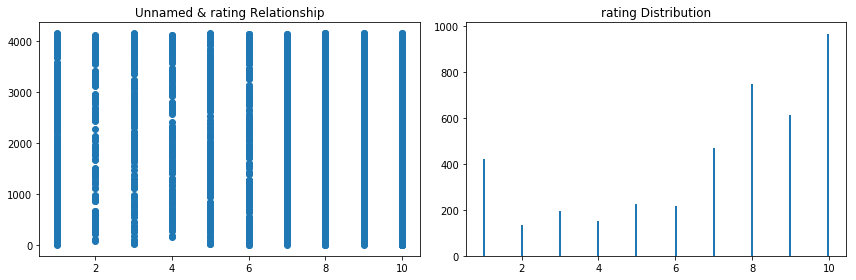

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(all_df['rating'], all_df['Unnamed: 0'])
ax[1].hist(all_df['rating'], bins=200)

ax[0].set_title("Unnamed & rating Relationship")
ax[1].set_title("rating Distribution")

plt.tight_layout()

#### Observation:
From the scatter plot, it is observed that there is no linear relationship between column
'unknown' and rating. however, maybe the long tramsformation would help reduce the variance. let's see

In [10]:
d = all_df[['Unnamed: 0','rating']]
df = pd.DataFrame(d)
df['Unnamed: 0' ] = np.log(df['Unnamed: 0'])
df.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,rating
0,7.697121,4
1,8.044626,1
2,7.044033,10
3,8.280711,3
4,7.576097,2


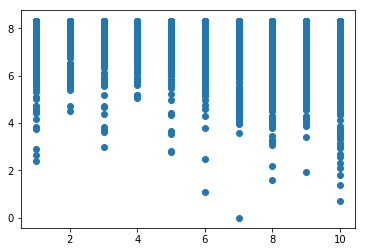

In [11]:
plt.scatter(df['rating'], df['Unnamed: 0'])

#### Observation:
After afpplying the log transformation, the relationship was still not linear, hence,it might not really predict the target variable 'rating', it might probably be the customers ID number

In [12]:
# Since I would like to work binary classification, then we do the following:

# Converting every rating that is >= 5 as 1, while rating less than 5 are 0
all_df['rating_binary'] = (all_df['rating']>= 5).astype(int)
all_df['rating_binary'].head()

0    0
1    0
2    1
3    0
4    0
Name: rating_binary, dtype: int64

In [13]:
# The 5 levels of 'effectiveness'
all_df.effectiveness.unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [14]:
# The five levels of 'sideEffects'
all_df.sideEffects.unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

 Since the are only 5 levels in 'effectiveness' and 'sideEffect', a one-hot-encoding would be fine.

In [15]:
#!pip3 install category_encoders
import category_encoders as ce

In [16]:
# One-hot-encoding for the variable 'sideEffects'
cat_sideEffects_onehot = all_df.copy()
cat_sideEffects_onehot = pd.get_dummies(cat_sideEffects_onehot, columns=['sideEffects'], prefix = ['sideEffects'])

df = pd.DataFrame(cat_sideEffects_onehot)
df.head(3)

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,benefitsReview,sideEffectsReview,commentsReview,rating_binary,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,2202,enalapril,4,Highly Effective,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",0,0,1,0,0,0
1,3117,ortho-tri-cyclen,1,Highly Effective,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",0,0,0,0,0,1
2,1146,ponstel,10,Highly Effective,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,1,0,0,0,1,0


In [17]:
# One-hot-encoding for the variable 'effectiveness'
cat_effectiveness_onehot = df.copy()
cat_effectiveness_onehot = pd.get_dummies(cat_sideEffects_onehot, columns=['effectiveness'], prefix = ['effectiveness'])

dff = pd.DataFrame(cat_effectiveness_onehot)
dff.head(3)

,Unnamed: 0,urlDrugName,rating,condition,benefitsReview,sideEffectsReview,commentsReview,rating_binary,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective
0,2202,enalapril,4,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",0,0,1,0,0,0,0,1,0,0,0
1,3117,ortho-tri-cyclen,1,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",0,0,0,0,0,1,0,1,0,0,0
2,1146,ponstel,10,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,1,0,0,0,1,0,0,1,0,0,0


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# Concatinating the all other columns to get a bag of words before using the Countvectorizer
All_data = dff['condition'] + dff['sideEffectsReview'] + dff['benefitsReview'] + dff['commentsReview']

In [20]:
All_data.head()

0    management of congestive heart failurecough, h...
1    birth preventionHeavy Cycle, Cramps, Hot Flash...
2    menstrual crampsHeavier bleeding and clotting ...
3    acid refluxConstipation, dry mouth and some mi...
4    fibromyalgiaI felt extremely drugged and dopey...
dtype: object

In [21]:
count_vec = CountVectorizer(max_features=150, binary=True)
All_data = All_data.apply(lambda x: str(x))

A=count_vec.fit_transform(All_data)
A = A.toarray()
All_data = A

In [22]:
# The Countvectorizer outputs the first most occuring 150 words.
All_data= pd.DataFrame(All_data)
All_data.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,1,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [23]:
# # Find most frequently occuring words and their count or percentage
# from nltk.tokenize.treebank import TreebankWordDetokenizer
# from nltk.corpus import stopwords
# from nltk import word_tokenize

# # set seaborn style 
# sns.set(style="whitegrid")

# stopwords = set(stopwords.words('english'))
# # Detokenizer combines tokenized elements
# detokenizer = TreebankWordDetokenizer()

In [24]:
# def clean_description(desc):
#     desc = word_tokenize(desc.lower())
#     desc = [token for token in desc if token not in stopwords and token.isalpha()]
#     return detokenizer.detokenize(desc)

# cleaned_description = All_data.apply(clean_description)

# word_occurrence = cleaned_description.str.split(expand=True).stack().value_counts()

# total_words = sum(word_occurrence)

# # plot most common words 

# top_words = word_occurrence[:20]/total_words

# ax = sns.barplot(x = top_words.values, y = top_words.index)

# # Setting title 
# ax.set_title("% Occurrence of Most Frequent Words")

Since I have 2 dataframes, one from the one-hot-encoding and the other from the countvectorizer,
I just need to pop out the columns I had already vectorize in the dataframe dff

In [25]:
pop_Unnamed = dff.pop('Unnamed: 0')
pop_urlDrugName = dff.pop('urlDrugName')
pop_condition = dff.pop('condition')
pop_benefitsReview = dff.pop('benefitsReview')
pop_sideEffectsReview = dff.pop('sideEffectsReview')
pop_commentsReview = dff.pop('commentsReview')
pop_rating = dff.pop('rating')

In [26]:
dff.head(5)

,rating_binary,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective
0,0,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,1,0


In [27]:
# Reseting the index values to the first dataframe appends properly
All_data = All_data.reset_index(drop=True)
All_data.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,1,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [28]:
# Now that I have the two dataframes ready to analize, I concatinated them.  
horizontal_stack = pd.concat([dff, All_data], axis=1)
horizontal_stack.head()

,rating_binary,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,...,140,141,142,143,144,145,146,147,148,149
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [29]:
# Converting them to a numpy array
train_data = horizontal_stack.values
train_data

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0]])

In [30]:
#seperating the features from the target
X, y = train_data[:, :-1], train_data[:, -1]

In [31]:
# A function to randomly shuffle my data and split into different percentages
def split_data(X, y, percent=1.0):
    np.random.seed(42)
    order = np.random.permutation(len(X))
    split = int(len(X)*percent)
    X_shuffled = X[order]
    y_shuffled = y[order]
        
    Train_X = X_shuffled[:split]
    Train_Y = y_shuffled[:split]
    
    Test_X = X_shuffled[split:]
    Test_Y = y_shuffled[split:]
    
    return Train_X, Train_Y, Test_X, Test_Y

### GDA Implementation 

In [32]:
class GDA:
    def __init__(self):
        pass
        
    def phi(self, Train_Y):
        return (1/self.m)* np.sum((Train_Y==1))

    def means(self, Train_X, Train_Y):
        M_0 = np.mean(Train_X[(Train_Y ==0)], axis=0)
        M_1 = np.mean(Train_X[(Train_Y ==1)], axis=0)
        return M_0, M_1

    def mean_difference(self, Train_X, Train_Y):
        
        mu_diff = np.zeros(Train_X.shape)
        for i in range(self.m):
            if Train_Y[i] == 0:
                X_t = Train_X[i] - self.M_0
            else:
                X_t = Train_X[i]- self.M_1
            mu_diff[i] = X_t
        return mu_diff
    
    
    def covariance(self):
        sigma = (np.dot(self.mu_diff.T, self.mu_diff))/self.m
        return sigma
    
    def fit(self, Train_X, Train_Y):
        
        self.m, self.n = Train_X.shape
        
        self.phi_1 = self.phi(Train_Y)
        self.M_0, self.M_1 = self.means(Train_X, Train_Y)
        self.mu_diff = self.mean_difference(Train_X, Train_Y)
        self.sigma = self.covariance() + 1e-8 * np.eye(self.n)

        return self
    
    def p_x_y_equals_0(self, X): 
    
        det_sigma = np.linalg.det(self.sigma)
        inv_sigma = np.linalg.pinv(self.sigma)
        
        compu_1 = 1./(((2*np.pi)**(self.n/2))*(det_sigma**(1/2)))
        compu_2 = np.dot((X - self.M_0), inv_sigma)
        compu_3 = np.exp(np.sum((-1/2)*(compu_2 * (X - self.M_0)), axis = 1))
        return compu_1*compu_3
    
    
    def p_x_y_equals_1(self,X):
        
        det_sigma = np.linalg.det(self.sigma)
        inv_sigma = np.linalg.pinv(self.sigma)
        
        compu_1 = 1./(((2*np.pi)**(self.n/2))*(det_sigma**(1/2)))
        compu_2 = np.dot((X - self.M_1), inv_sigma)
        compu_3 = np.exp(np.sum((-1/2)*(compu_2 * (X - self.M_1)), axis = 1))
        return compu_1*compu_3
    
    
    def predict_proba(self, Test_X):
        pxy0 = self.p_x_y_equals_0(Test_X)
        pxy1 = self.p_x_y_equals_1(Test_X)

        prob_0 = pxy0 * (1 - self.phi_1)
        prob_1 = pxy1 * self.phi_1

        py = np.concatenate([prob_0.reshape(-1,1), prob_1.reshape(-1,1)], axis=1)
        return py
    
    def predict(self, Test_X):        
        py = self.predict_proba(Test_X)
        predictions = np.argmax(py, axis =1)

        return predictions
        
    
    def accuracy(self,Test_X,Test_Y):
        y_pred = self.predict(Test_X)
        return np.sum(y_pred == Test_Y) * 100/ len(Test_Y)
    

### Naive Bayes Implementation

In [33]:
class Naive:
    def __init__(self):
        pass
        
    def phi_of_y(self,Y):
        
        m = Y.shape[0]
        phi_y = []
        for c in self.classes:
            phi_y_c = (np.sum(Y == c))/m
            phi_y.append(phi_y_c)
        return phi_y

    
    def phi_of_x(self,X,Y):
        
        phi_x = np.zeros((self.n,len(self.classes)))
        for j in range(self.n):
            for c in self.classes:
                phi_x_y_class = ((X[: ,j])@(Y==c))
                phi_x[j,c] = (phi_x_y_class+1)/(np.sum(Y==c) + (self.n))
        return phi_x
    
    
    def fit(self, Train_X, Train_Y,Test_X ):
            self.classes = set(Train_Y)
            self.m, self.n = Train_X.shape
            self.phi_y = self.phi_of_y(Train_Y)
            self.phi_x = self.phi_of_x(Train_X,Train_Y)
            self.pred = self.prediction(Test_X,self.phi_x,self.phi_y)
            return self 

           
    def prediction(self,Test_X,phi_X,phi_Y):
        m,n = Test_X.shape
        phi_X = self.phi_x
        phi_Y = self.phi_y        
        num_classes = len(self.classes)

        result = np.zeros((m,num_classes))
        for i in range(m):
            for c in range(num_classes):
                px_y = np.zeros(n)
                x_i = Test_X[i]
                px_y[x_i==1] = np.log(phi_X[x_i ==1,c])
                px_y[x_i==0] = np.log(1-phi_X[x_i ==0,c])
                result[i,c] = np.sum(px_y) + np.log(phi_Y[c])
        return result                  

    
    def accuracy(self,Test_Y):
        Test_Y = Test_Y
        big = np.argmax(self.pred,axis = 1)
        return np.sum(big == Test_Y) * 100/ len(Test_Y)

#     def __repr__(self):
#         return 'Hi'
            

### Logistic_Regression implementation

In [34]:
class Logistic_regression:
    def __init__(self, lr = 0.01, iterations = 700,print_out=False):
        self.lr = lr
        self.iterations = iterations
                    
        self.print_out = print_out
        
    def add_ones(self, X):
        return np.hstack((np.ones((len(X),1)),X))
        
    def sigmoid(self,x):
        return 1/(1+ np.exp(-x))
    
    
    def gradient(self,X,Y,Y_pred):
        error = Y.reshape(-1,1) - Y_pred
        grad = np.dot(X.T,error)

        cost = -(1/self.m) *np.sum(Y*np.log(Y_pred) + (1-Y) * np.log(1-Y_pred))    
        return grad, cost  
    
        
    def fit(self, train_data, train_labels):
        self.train_labels = train_labels
        self.train_data = self.add_ones(train_data)
        
        self.m,self.n = self.train_data.shape
        self.params = np.zeros((self.n,1))
        
        for i in range(self.iterations):
            Y_pred = self.sigmoid(np.matmul(self.train_data,self.params))
            grad,cost = self.gradient(self.train_data,self.train_labels,Y_pred)
            
            self.params = self.params + self.lr * grad
 
            if i % 100 ==0 and self.print_out:
                print('cost for iteration:', i, ' , ', cost)

    def pred(self,X_test):
        X = self.add_ones(X_test)
        Y_pred = self.sigmoid(np.dot(X,self.params)).round()
        return Y_pred
    
    def accuracy(self,X_test,Y_test):
        Y_test = Y_test.reshape(-1,1)
        Y_pred = self.pred(X_test)
        accu = np.sum(Y_pred == Y_test)*100/ len(Y_test)
        return accu     

#### 10% of the data

In [35]:
# 10% of my percentage needed
X10, y10, _, _ = split_data(X, y, percent=0.1)
Train_X10, Train_Y10, Test_X10, Test_Y10 = split_data(X10, y10, percent=0.8)

In [36]:
# The GDA Model
model1 = GDA()
model1.fit(Train_X10, Train_Y10)
model1.accuracy(Test_X10,Test_Y10)

81.92771084337349

In [37]:
#The Naive Bayes Model
Model2 = Naive()
Model2.fit(Train_X10, Train_Y10,Test_X10)
Model2.accuracy(Test_Y10)

90.36144578313252

In [45]:
# The Logistic Regression Model
Model3 = Logistic_regression(lr=0.001)
Model3.fit(Train_X10,Train_Y10)
Model3.accuracy(Test_X10,Test_Y10)

89.1566265060241

#### Observation:

Using 10% of the data, the variance in each of the accuracy does not differ so much, however, Naive Bayes model had the 
higest accuracy followed by the Logistics regression and lastly by the GDA model

#### 30% of the data

In [40]:
# 30% of my percentage needed
X30, y30, _, _ = split_data(X, y, percent=0.3)
Train_X30, Train_Y30, Test_X30, Test_Y30 = split_data(X30, y30, percent=0.8)

In [41]:
# The GDA Model
model1 = GDA()
model1.fit(Train_X30, Train_Y30)
model1.accuracy(Test_X30,Test_Y30)

84.73895582329317

In [42]:
#The Naive Bayes Model
Model2 = Naive()
Model2.fit(Train_X30, Train_Y30,Test_X30)
Model2.accuracy(Test_Y30)

81.52610441767068

In [43]:
# The Logistic Regression Model
Model3 = Logistic_regression(lr=0.001)
Model3.fit(Train_X30,Train_Y30)
Model3.accuracy(Test_X30,Test_Y30)

85.5421686746988

#### Observation:

Using 30% of the data, the Logistics regression Model now perfomed better than the followed by the Naive Bayes model had the GDA model which had the least accuracy

#### 60% of the data 

In [47]:
# 60% of my percentage needed
X60, y60, _, _ = split_data(X, y, percent=0.6)
Train_X60, Train_Y60, Test_X60, Test_Y60 = split_data(X60, y60, percent=0.8)

In [48]:
# The GDA Model
model1 = GDA()
model1.fit(Train_X60, Train_Y60)
model1.accuracy(Test_X60,Test_Y60)

87.12273641851107

In [49]:
#The Naive Bayes Model
Model2 = Naive()
Model2.fit(Train_X60, Train_Y60,Test_X60)
Model2.accuracy(Test_Y60)

84.10462776659959

In [50]:
# The Logistic Regression Model
Model3 = Logistic_regression(lr=0.001)
Model3.fit(Train_X60,Train_Y60)
Model3.accuracy(Test_X60,Test_Y60)

87.5251509054326

#### Observation:

For the 60% of the data used, Logistic Regression still had the highest accuracy, although the accuracy of that of GDA shoot up from being the least to almost being the best. Naive Bayes now had the least accuracy.

#### 100% of the data

In [51]:
# 100% of my percentage needed
X100, y100, _, _ = split_data(X, y, percent=1.0)
Train_X100, Train_Y100, Test_X100, Test_Y100 = split_data(X100, y100, percent=0.8)

In [52]:
# The GDA Model
model1 = GDA()
model1.fit(Train_X100, Train_Y100)
model1.accuracy(Test_X100,Test_Y100)

88.41978287092883

In [53]:
#The Naive Bayes Model
Model2 = Naive()
Model2.fit(Train_X100, Train_Y100,Test_X100)
Model2.accuracy(Test_Y100)

83.83594692400483

In [54]:
# The Logistic Regression Model
Model3 = Logistic_regression(lr=0.001)
Model3.fit(Train_X100,Train_Y100)
Model3.accuracy(Test_X100,Test_Y100)

88.66103739445114

#### Observation:

Using the whole data set, the 3 accuracies where not too far from each other, however, the Logistics regression wtill had the highest accuracy while Naive Bayes had the least.

### Summary and Conclusion:

Data collected was a text data, 



 The accuracy for 10% of the data was 79.5181
 
 The accuracy for 30% of the data was 89.9598
 
 The accuracy for 60% of the data was 86.5191
 
 The accuracy for 100% of the data was 86.4897
 
 ##### Observation:
 
From the above 4 accuracies, it was observed that GDA algorithm favours small training example, if just 10% of the data could have such a high accuracy of 79.5181 whereas, a large training example of 100% had an accuracy of 86.4897, it means GDA performance does not really require a large training example. however, from the data given, using just 30% of the data gave the best accuracy. 

For The Logistics Regression Model, (with Binary Classificatio):

The accuracy for 10% of the data was 89.1566
 
The accuracy for 30% of the data was 89.9598
 
The accuracy for 60% of the data was 84.5070
 
The accuracy for 100% of the data was 87.5753
 
 ##### Observation:
 
From the above 4 accuracies, it was observed that Logistics Regression Model tends to favours small training example, if just 10% of the data could have such a high accuracy of 89.1566 whereas, a large training example of 60% had an accuracy of 84.5070, but its can not be generalized, since the accuracy increased when 100% of the data set was used. because we can not explicitely conclude that by adding more data, we get better accuracy. hence, the model is underfitting. 